### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('../data/clean_data.csv')

### Aggregate metrics per customer (MSISDN)

In [8]:
# Aggregate metrics per MSISDN
engagement_metrics = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',            # Session frequency
    'Dur. (ms)': 'sum',              # Total session duration
    'Total DL (Bytes)': 'sum',       # Total download traffic
    'Total UL (Bytes)': 'sum'        # Total upload traffic
})

# Rename columns for clarity
engagement_metrics.columns = ['Session Frequency', 'Total Duration (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']

# Add total traffic (DL + UL)
engagement_metrics['Total Traffic (Bytes)'] = engagement_metrics['Total DL (Bytes)'] + engagement_metrics['Total UL (Bytes)']

# Show top 10 users by each metric
top_10_frequency = engagement_metrics.sort_values('Session Frequency', ascending=False).head(10)
top_10_duration = engagement_metrics.sort_values('Total Duration (ms)', ascending=False).head(10)
top_10_traffic = engagement_metrics.sort_values('Total Traffic (Bytes)', ascending=False).head(10)

print("Top 10 users by Session Frequency:")
top_10_frequency

Top 10 users by Session Frequency:


,Session Frequency,Total Duration (ms),Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
MSISDN/Number,,,,,
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,7.971167e+09
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,8.846226e+09
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,8.499621e+09
3.365973e+10,16,4035428.0,7.081602e+09,624260321.0,7.705863e+09
3.367588e+10,15,4865947.0,7.309542e+09,581568792.0,7.891111e+09
3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,8.514774e+09
3.366716e+10,13,8744914.0,5.052068e+09,566326364.0,5.618394e+09
3.360452e+10,12,5207990.0,5.096079e+09,391775856.0,5.487855e+09
3.376041e+10,12,5321667.0,6.610852e+09,521518890.0,7.132371e+09


In [9]:
print("\nTop 10 users by Total Duration:")
top_10_duration


Top 10 users by Total Duration:


,Session Frequency,Total Duration (ms),Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
MSISDN/Number,,,,,
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,8.499621e+09
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,8.846226e+09
3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,8.514774e+09
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,7.971167e+09
3.366716e+10,13,8744914.0,5.052068e+09,566326364.0,5.618394e+09
3.366284e+10,9,6614270.0,3.593674e+09,406424372.0,4.000098e+09
3.366469e+10,9,6288730.0,5.279827e+09,402180804.0,5.682007e+09
3.360313e+10,12,6287761.0,4.540607e+09,435587631.0,4.976195e+09
3.366746e+10,6,5649882.0,2.334299e+09,266222647.0,2.600522e+09


In [10]:
print("\nTop 10 users by Total Traffic:")
top_10_traffic


Top 10 users by Total Traffic:


,Session Frequency,Total Duration (ms),Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
MSISDN/Number,,,,,
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,8.846226e+09
3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,8.514774e+09
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,8.499621e+09
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,7.971167e+09
3.367588e+10,15,4865947.0,7.309542e+09,581568792.0,7.891111e+09
3.365973e+10,16,4035428.0,7.081602e+09,624260321.0,7.705863e+09
3.366646e+10,11,4536757.0,6.903440e+09,405060976.0,7.308501e+09
3.376041e+10,12,5321667.0,6.610852e+09,521518890.0,7.132371e+09
3.366471e+10,11,2927785.0,6.400774e+09,471244453.0,6.872018e+09


### Normalize the Metrics and Perform K-Means Clustering

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the engagement metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics)

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)

# Compute statistics for each cluster
cluster_stats = engagement_metrics.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

print(cluster_stats)

        Session Frequency                      Total Duration (ms)  \
                      min max      mean    sum                 min   
Cluster                                                              
0                       1   2  1.035704  83456              7142.0   
1                       2  18  4.339558  16499             66594.0   
2                       1   4  2.179310  48980             18235.0   

                                                 Total DL (Bytes)  \
                max           mean           sum              min   
Cluster                                                             
0         1573420.0  105113.932898  8.469976e+09        8827082.0   
1        18553754.0  619210.796423  2.354239e+09      404647470.0   
2         1698167.0  213331.373037  4.794623e+09      165877820.0   

                                                  Total UL (Bytes)  \
                  max          mean           sum              min   
Cluster                 

### Aggregate User Total Traffic Per Application and Plot Top 3 Applications

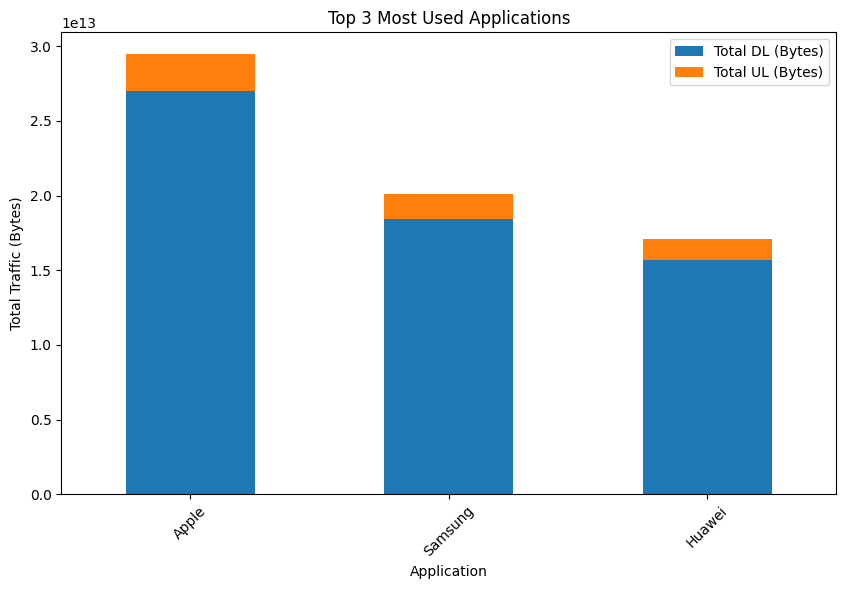

In [12]:
# Aggregate total traffic per application
application_traffic = df.groupby('Handset Manufacturer').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
})

application_traffic['Total Traffic (Bytes)'] = application_traffic['Total DL (Bytes)'] + application_traffic['Total UL (Bytes)']

# Show top 3 most used applications
top_3_applications = application_traffic.sort_values('Total Traffic (Bytes)', ascending=False).head(3)

# Plotting the top 3 most used applications
top_3_applications[['Total DL (Bytes)', 'Total UL (Bytes)']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.xticks(ticks=range(3), labels=top_3_applications.index, rotation=45)
plt.show()

### Determine the Optimal Number of Clusters (k) Using the Elbow Method

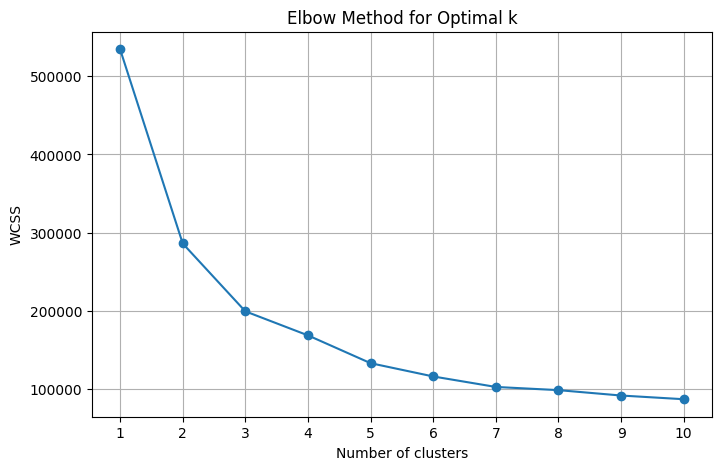

In [13]:
import matplotlib.pyplot as plt

# Calculate WCSS (Within-cluster sum of squares) for different k values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### Visualization of K-Means Clustering Results

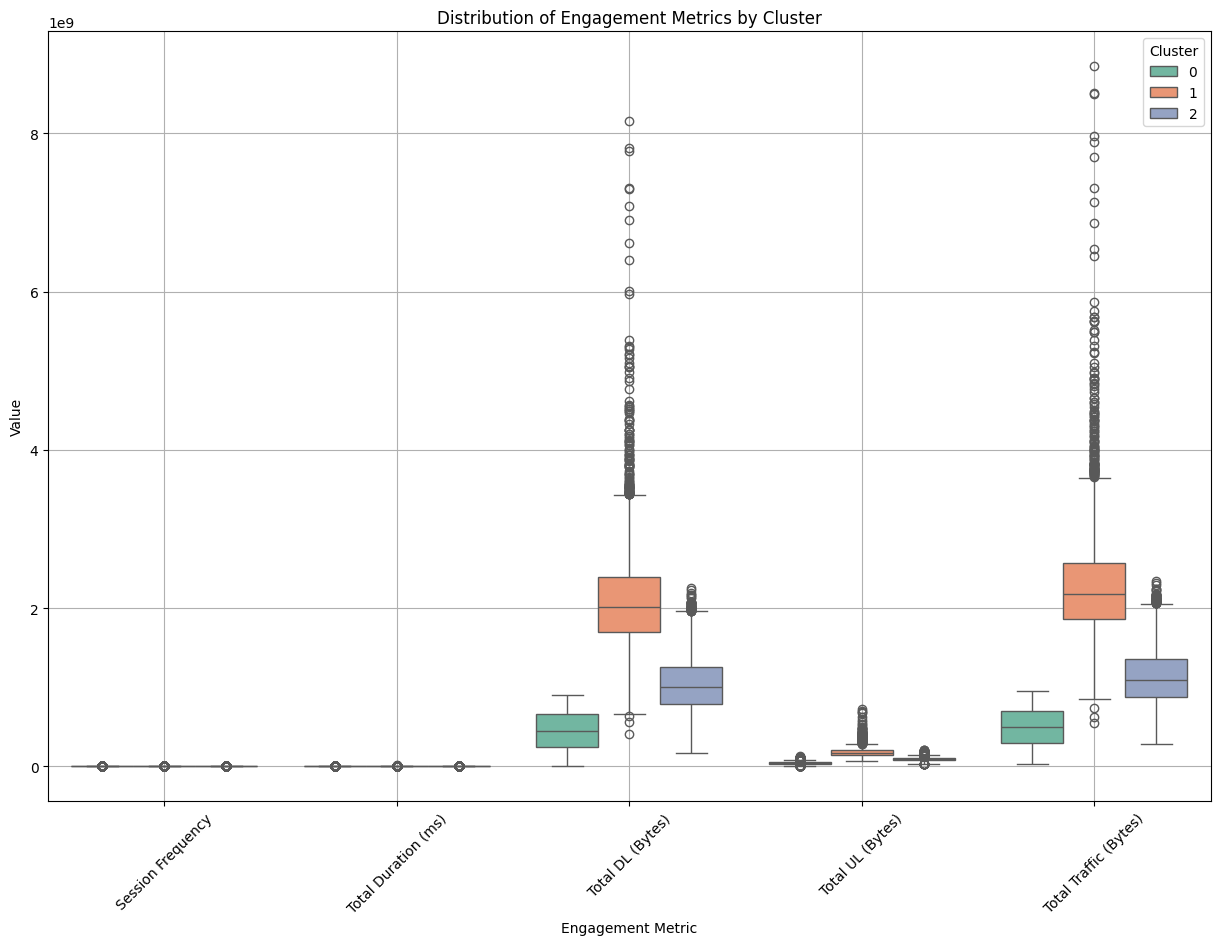

In [14]:
# Melt the DataFrame for easy plotting with seaborn
melted_metrics = engagement_metrics.reset_index().melt(id_vars='Cluster', value_vars=['Session Frequency', 'Total Duration (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Traffic (Bytes)'])

# Create box plots for each metric
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', hue='Cluster', data=melted_metrics, palette='Set2')
plt.title('Distribution of Engagement Metrics by Cluster')
plt.xlabel('Engagement Metric')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
